In [66]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm, truncnorm
from scipy.special import erf
from scipy.odr import ODR, Model, RealData

from dotenv import load_dotenv
load_dotenv(override=True)

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)

from main_code.step_11_distance_modulus import calculate_distance_modulus
from main_code.utils.constants import *

In [ ]:
# Load CF4 FP data
df = pd.read_csv("../../data/external/cf4/raw/cf4_fp_distances.txt")

# Select 6dFGS data with other measurements (SMAC, ENEAR, EFAR)
df = df[["pgc", "6dfgs_flag", "fpsdss_flag", "smac_flag", "enear_flag", "efar_flag"]]
df = df[(df["6dfgs_flag"] == 0) & ((df["fpsdss_flag"] == 0) | (df["smac_flag"] == 0) | (df["enear_flag"] == 0) | (df["efar_flag"] == 0))]

# Save the galaxy id
df[["pgc"]].to_csv("./6dfgs/cf4_6dfgs_with_other_fps.csv", index=False)

(30.0, 40.0)

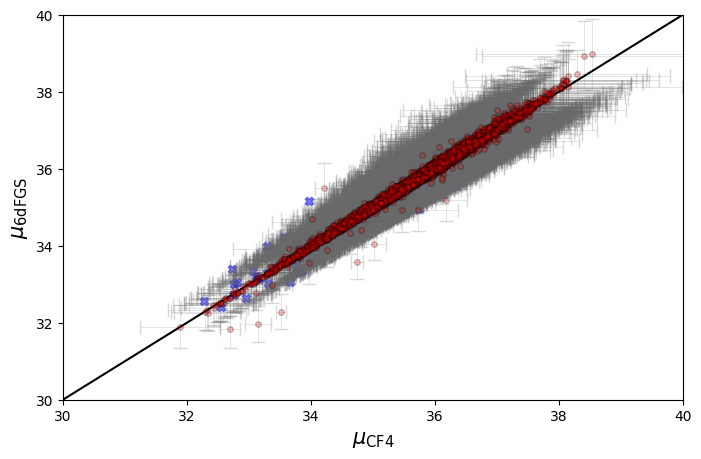

In [ ]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", "DM", "eDM"]].rename({"DM": "DM_cf4", "eDM": "eDM_cf4"}, axis=1)

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/6dfgs.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]

df_lookup = pd.read_csv("../../data/external/pgc/6dfgs.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

# Load galaxies with repeat measurements from other methods (SNIa, TF, etc.) and make 2 separate dataframes
df_repeat = pd.read_csv("./6dfgs/cf4_6dfgs_with_other_fps.csv")
galaxy_ids = df_repeat["pgc"].tolist()

df_single = df[~(df["pgc"].isin(galaxy_ids))]
df_multiple = df[(df["pgc"].isin(galaxy_ids))]


# Plot
fig, ax = plt.subplots(figsize=(8, 5))
left_ = 30
right_ = 40

# Plot single galaxies
ax.errorbar(x=df_single["DM_cf4"], y=df_single["DM_common_abc"], xerr=df_single["eDM_cf4"], yerr=df_single["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)

# Plot galaxies with multiple measurements
# ax.errorbar(x=df_multiple["DM_cf4"], y=df_multiple["DM_common_abc"], xerr=df_multiple["eDM_cf4"], yerr=df_multiple["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)
ax.scatter(df_multiple["DM_cf4"], df_multiple["DM_common_abc"], marker="X", c="b", alpha=0.5)

ax.plot([left_, right_], [left_, right_], c='k')

ax.set_xlabel(r"$\mu_\mathrm{CF4}$", fontsize=15)
ax.set_ylabel(r"$\mu_\mathrm{6dFGS}$", fontsize=15)
ax.set_xlim(left_, right_)
ax.set_ylim(left_, right_)

# plt.errorbar()

### My 6dFGS with average (FP method)

(30.0, 40.0)

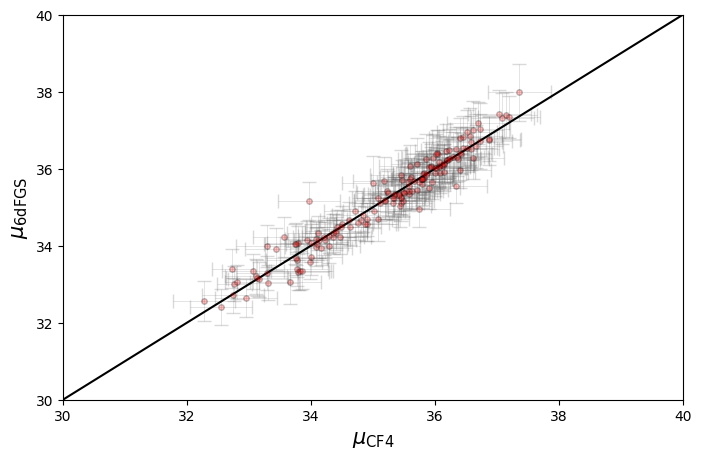

In [ ]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", "DM", "eDM"]].rename({"DM": "DM_cf4", "eDM": "eDM_cf4"}, axis=1)

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/6dfgs.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]

df_lookup = pd.read_csv("../../data/external/pgc/6dfgs.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

# Load galaxies with repeat measurements from SMAC, ENEAR, EFAR, and make 2 separate dataframes
df_repeat = pd.read_csv("./6dfgs/cf4_6dfgs_with_other_fps.csv")
galaxy_ids = df_repeat["pgc"].tolist()

df_single = df[~(df["pgc"].isin(galaxy_ids))]
df_multiple = df[(df["pgc"].isin(galaxy_ids))]


# Plot
fig, ax = plt.subplots(figsize=(8, 5))
left_ = 30
right_ = 40

# Plot single galaxies
# ax.errorbar(x=df_single["DM_cf4"], y=df_single["DM_common_abc"], xerr=df_single["eDM_cf4"], yerr=df_single["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)

# Plot galaxies with multiple measurements
ax.errorbar(x=df_multiple["DM_cf4"], y=df_multiple["DM_common_abc"], xerr=df_multiple["eDM_cf4"], yerr=df_multiple["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)

ax.plot([left_, right_], [left_, right_], c='k')

ax.set_xlabel(r"$\mu_\mathrm{CF4}$", fontsize=15)
ax.set_ylabel(r"$\mu_\mathrm{6dFGS}$", fontsize=15)
ax.set_xlim(left_, right_)
ax.set_ylim(left_, right_)

# plt.errorbar()

FP repeat measurements is not the cause. Try another.

# 6dFGS galaxy repeat measurements with other methods

In [ ]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", 'DMsnIa', 'DMtf', 'DMfp', 'DMsbf',
           'DMsnII','DMtrgb', 'DMcep', 'DMmas',]]

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/6dfgs.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]
df_lookup = pd.read_csv("../../data/external/pgc/6dfgs.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

df = df[(~df["DMsnIa"].isna()) | (~df["DMtf"].isna()) | (~df["DMsbf"].isna()) | (~df["DMsnII"].isna()) | (~df["DMtrgb"].isna()) | (~df["DMcep"].isna()) | (~df["DMmas"].isna())]

df[["pgc"]].to_csv("./6dfgs/cf4_6dfgs_other_methods.csv", index=False)

(31.0, 40.5)

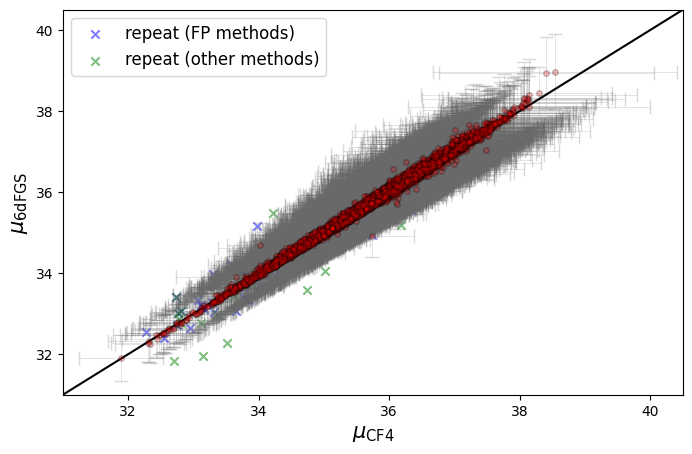

In [ ]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", "DM", "eDM"]].rename({"DM": "DM_cf4", "eDM": "eDM_cf4"}, axis=1)

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/6dfgs.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]

df_lookup = pd.read_csv("../../data/external/pgc/6dfgs.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

# Load galaxies with repeat measurements and make 3 separate dataframes
df_repeat_fp = pd.read_csv("./6dfgs/cf4_6dfgs_with_other_fps.csv")
galaxy_ids_fp = df_repeat_fp["pgc"].tolist()

df_repeat_other = pd.read_csv("./6dfgs/cf4_6dfgs_other_methods.csv")
galaxy_ids_other = df_repeat_other["pgc"].tolist()

df_single = df[(~(df["pgc"].isin(galaxy_ids_fp))) & (~(df["pgc"].isin(galaxy_ids_other)))]
df_multiple_fp = df[(df["pgc"].isin(galaxy_ids_fp))]
df_multiple_other = df[(df["pgc"].isin(galaxy_ids_other))]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
left_ = 31
right_ = 40.5

# Plot single galaxies
ax.errorbar(x=df_single["DM_cf4"], y=df_single["DM_common_abc"], xerr=df_single["eDM_cf4"], yerr=df_single["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)

# Plot galaxies with multiple measurements
# ax.errorbar(x=df_multiple["DM_cf4"], y=df_multiple["DM_common_abc"], xerr=df_multiple["eDM_cf4"], yerr=df_multiple["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)
ax.scatter(df_multiple_fp["DM_cf4"], df_multiple_fp["DM_common_abc"], marker="x", c="b", alpha=0.5, label="repeat (FP methods)")
ax.scatter(df_multiple_other["DM_cf4"], df_multiple_other["DM_common_abc"], marker="x", c="green", alpha=0.5, label="repeat (other methods)")

ax.plot([left_, right_], [left_, right_], c='k')

ax.legend(fontsize=12)
ax.set_xlabel(r"$\mu_\mathrm{CF4}$", fontsize=15)
ax.set_ylabel(r"$\mu_\mathrm{6dFGS}$", fontsize=15)
ax.set_xlim(left_, right_)
ax.set_ylim(left_, right_)

# plt.errorbar()

# Compare directly with CF4's 6dFGS FP

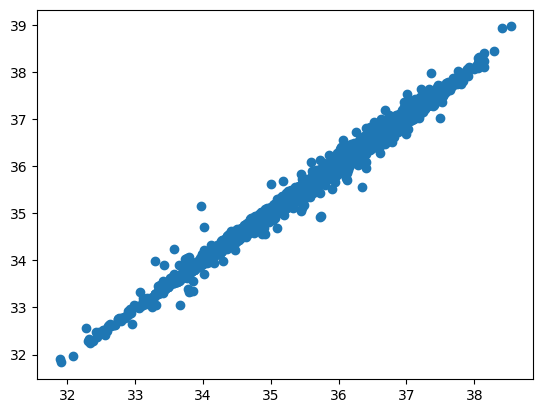

In [12]:
# Load CF4 FP distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", 'DMfp', 'eDMfp']]

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/6dfgs.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]].rename({"_6dFGS": "Name"}, axis=1)
df_lookup = pd.read_csv("../../data/external/pgc/6dfgs.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

plt.scatter(df["DMfp"], df["DM_common_abc"])

# Cullan's SDSS with repeat measurements

### FP methods

In [18]:
# Load CF4 FP data
df = pd.read_csv("../../data/external/cf4/raw/cf4_fp_distances.txt")

# Select 6dFGS data with other measurements (SMAC, ENEAR, EFAR)
df = df[["pgc", "6dfgs_flag", "fpsdss_flag", "smac_flag", "enear_flag", "efar_flag"]]
df = df[(df["fpsdss_flag"] == 0) & ((df["6dfgs_flag"] == 0) | (df["smac_flag"] == 0) | (df["enear_flag"] == 0) | (df["efar_flag"] == 0))]

# Save the galaxy id
df[["pgc"]].to_csv("./sdss/cf4_sdss_with_other_fps.csv", index=False)

### Other methods

In [15]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", 'DMfp', 'DMsnIa', 'DMtf', 'DMsbf',
           'DMsnII','DMtrgb', 'DMcep', 'DMmas',]]

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/sdss.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]
df_lookup = pd.read_csv("../../data/external/pgc/sdss.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

df = df[(~df["DMsnIa"].isna()) | (~df["DMtf"].isna()) | (~df["DMsbf"].isna()) | (~df["DMsnII"].isna()) | (~df["DMtrgb"].isna()) | (~df["DMcep"].isna()) | (~df["DMmas"].isna())]

df[["pgc"]].to_csv("./sdss/cf4_sdss_other_methods.csv", index=False)

(31.0, 40.5)

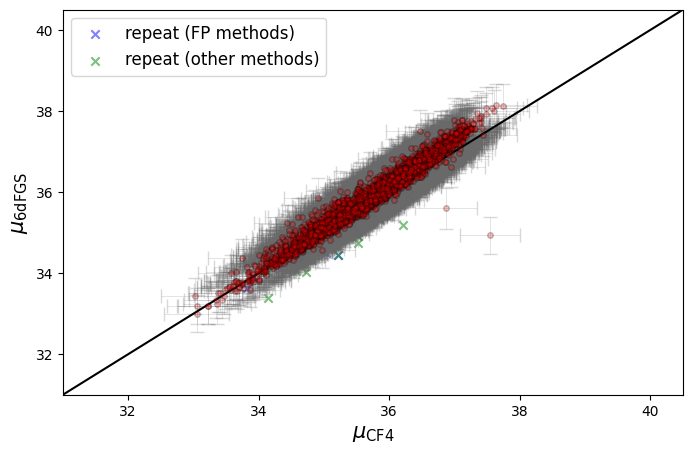

In [38]:
# Load CF4 individual distances
df1 = pd.read_csv("../../data/external/cf4/raw/CF4_all_individual.txt")
df1 = df1[["pgc", "DM", "eDM"]].rename({"DM": "DM_cf4", "eDM": "eDM_cf4"}, axis=1)

# Load my data & fetch pgc from lookup table
df2 = pd.read_csv("../../data/foundation/distance_modulus/sdss.csv")
df2 = df2[["survey_id", "DM_common_abc", "eDM_common_abc"]]

df_lookup = pd.read_csv("../../data/external/pgc/sdss.csv")
df2 = df2.merge(df_lookup, on="survey_id", how="left")

# Merge common galaxies
df = df2.merge(df1, on="pgc", how="inner")

# Load galaxies with repeat measurements and make 3 separate dataframes
df_repeat_fp = pd.read_csv("./sdss/cf4_sdss_with_other_fps.csv")
galaxy_ids_fp = df_repeat_fp["pgc"].tolist()

df_repeat_other = pd.read_csv("./sdss/cf4_sdss_other_methods.csv")
galaxy_ids_other = df_repeat_other["pgc"].tolist()

df_single = df[(~(df["pgc"].isin(galaxy_ids_fp))) & (~(df["pgc"].isin(galaxy_ids_other)))]
df_multiple_fp = df[(df["pgc"].isin(galaxy_ids_fp))]
df_multiple_other = df[(df["pgc"].isin(galaxy_ids_other))]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
left_ = 31
right_ = 40.5

# Plot single galaxies
ax.errorbar(x=df_single["DM_cf4"], y=df_single["DM_common_abc"], xerr=df_single["eDM_cf4"], yerr=df_single["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)

# Plot galaxies with multiple measurements
# ax.errorbar(x=df_multiple["DM_cf4"], y=df_multiple["DM_common_abc"], xerr=df_multiple["eDM_cf4"], yerr=df_multiple["eDM_common_abc"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.25)
ax.scatter(df_multiple_fp["DM_cf4"], df_multiple_fp["DM_common_abc"], marker="x", c="b", alpha=0.5, label="repeat (FP methods)")
ax.scatter(df_multiple_other["DM_cf4"], df_multiple_other["DM_common_abc"], marker="x", c="green", alpha=0.5, label="repeat (other methods)")

ax.plot([left_, right_], [left_, right_], c='k')

ax.legend(fontsize=12)
ax.set_xlabel(r"$\mu_\mathrm{CF4}$", fontsize=15)
ax.set_ylabel(r"$\mu_\mathrm{6dFGS}$", fontsize=15)
ax.set_xlim(left_, right_)
ax.set_ylim(left_, right_)

# plt.errorbar()

In [ ]:
# Remaining outliers:
df_single[(df_single["DM_common_abc"] < 36) & (df_single["DM_cf4"] > 36.5)]

,survey_id,DM_common_abc,eDM_common_abc,pgc,DM_cf4,eDM_cf4
123,SDSS1237665372257452080,35.599928,0.501751,95929,36.869,0.48
1631,SDSS1237668337934073971,34.934606,0.454222,1494143,37.550,0.46


In [49]:
# Check FP observables values
outlier_ids = df_single[(df_single["DM_common_abc"] < 36) & (df_single["DM_cf4"] > 36.5)]["survey_id"].tolist()

# Load my data
df1 = pd.read_csv("../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv")
display(df1[df1["objid"].isin(outlier_ids)][["objid", "z_dist_est", "r", "s", "i", "logdist_common_abc"]])

# Load Cullan's data
df2 = pd.read_csv("../../data/external/h22/cullan_logdist.csv")
df2["objid"] = df2["objid"].apply(lambda x: "SDSS" + str(x))
display(df2[df2["objid"].isin(outlier_ids)][["objid", "zcmb_group", "r", "s", "i", "logdist_corr"]])

,objid,z_dist_est,r,s,i,logdist_common_abc
123,SDSS1237665372257452080,0.04166,0.269129,2.289030,3.334659,0.116198
1632,SDSS1237668337934073971,0.03776,0.132376,2.077446,3.256402,0.206719


,objid,zcmb_group,r,s,i,logdist_corr
33281,SDSS1237665372257452080,0.04178,0.27321,2.54966,2.29510,-0.140216
33707,SDSS1237668337934073971,0.03573,0.17434,2.83977,2.08089,0.304261


# Compare raw to Cullan

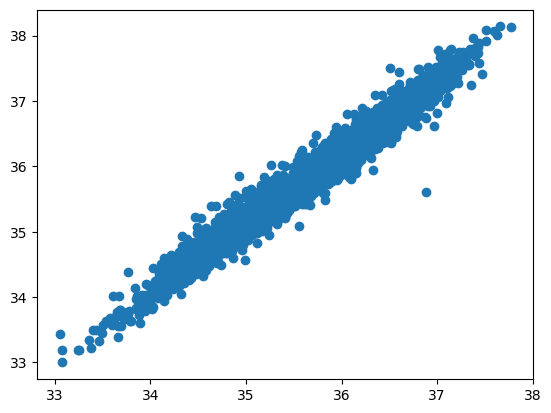

In [37]:
# Load Cullan's data
df1 = pd.read_csv("../../data/external/h22/cullan_logdist.csv")
df1["survey_id"] = df1["objid"].apply(lambda x: "SDSS" + str(x))
df1 = df1[["survey_id", "zcmb_group", "zhelio", "logdist_corr", "logdist_corr_err"]]
df1["DM_h22"], df1["eDM_h22"] = calculate_distance_modulus(
    df1["zcmb_group"].to_numpy(),
    df1["zhelio"].to_numpy(),
    df1["logdist_corr"].to_numpy(),
    df1["logdist_corr_err"].to_numpy(),
    H0=74.6
)

# Load my data
df2 = pd.read_csv("../../data/foundation/distance_modulus/sdss.csv")[["survey_id", "DM_common_abc"]]

# Merge
df = df1.merge(df2, on="survey_id")

plt.scatter(df["DM_h22"], df["DM_common_abc"])

In [28]:
df1

,PGC,coords,objid,specObjId,plate,RA,Dec,l,b,deVMag_g,...,s,es,i,ei,logdist,logdist_err,logdist_alpha,logdist_corr,logdist_corr_err,logdist_corr_alpha
0,1233903,J112934.7+023941,SDSS1237654030328922362,576621864177133568,512,172.394795,2.661484,260.750209,58.659639,17.54882,...,2.84734,0.01661,2.20262,0.01513,0.132164,0.102798,-0.576760,0.108613,0.102597,-0.680995
1,2180626,J161531.4+412425,SDSS1237659329777107022,1318559404106213120,1171,243.880668,41.407020,65.575776,46.176954,15.44160,...,3.32697,0.00634,2.29344,0.00724,0.046916,0.095898,-0.375417,0.027767,0.093567,-0.349573
2,3112054,J134427.9-001000,SDSS1237671957519794394,336665265779533824,299,206.116130,-0.166644,330.119970,59.876092,17.43604,...,2.75149,0.01837,2.29858,0.01343,0.021033,0.104337,-0.530621,0.003093,0.105062,-0.623428
3,3124224,J114611.6+032743,SDSS1237651755082580040,578859370373212160,514,176.548500,3.461874,266.736098,61.659548,17.88573,...,2.58515,0.02286,2.21004,0.02223,-0.018901,0.107711,-0.519613,-0.047273,0.108915,-0.598469
4,3122691,J114947.6+025635,SDSS1237671129127059618,578885758652278784,514,177.448413,2.942938,268.922247,61.674524,17.43210,...,2.79776,0.01599,2.26756,0.01529,-0.067468,0.104233,-0.550741,-0.087197,0.104653,-0.649119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34054,1824143,J135945.7+280117,SDSS1237665429169307943,2384816045723510784,2118,209.940589,28.021406,40.259214,74.845291,17.31200,...,2.86528,0.01266,2.23033,0.01420,0.085468,0.102212,-0.580367,0.139850,0.096897,-0.410401
34055,56786,J160218.0+162158,SDSS1237665531723317440,2472613143914768384,2196,240.575050,16.366201,29.418294,44.669599,15.29424,...,2.44175,0.00651,2.38024,0.00811,-0.060779,0.098943,-0.584279,-0.065817,0.095355,-0.438518
34056,58348,J162944.9+404842,SDSS1237655373573062713,919958120371873792,817,247.437155,40.811611,64.680181,43.506581,12.81371,...,2.48278,0.00446,2.46024,0.00579,0.225224,0.095139,-0.197331,0.221563,0.091369,-0.366103
34057,58191,J162741.1+405537,SDSS1237655472357114000,918822324826826880,816,246.921342,40.926966,64.835897,43.897452,13.70092,...,2.12474,0.00441,2.39683,0.00828,0.026271,0.096306,-0.476559,-0.000887,0.093916,-0.502596


In [84]:
# Check FP observables values
outlier_ids = df_single[(df_single["DM_common_abc"] < 36) & (df_single["DM_cf4"] > 36.5)]["survey_id"].tolist()

# Load my data
df1 = pd.read_csv("../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv")
df1 = df1[["objid", "zhelio", "z_cmb", "z_dist_est"]]

# Load Cullan's data
df2 = pd.read_csv("../../data/external/h22/cullan_logdist.csv")
df2["objid"] = df2["objid"].apply(lambda x: "SDSS" + str(x))
df2 = df2[["objid", "zhelio", "zcmb", "zcmb_group"]]

df = df1.merge(df2, on="objid")

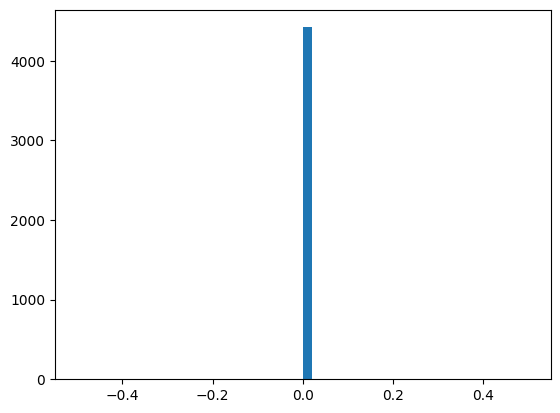

In [85]:
plt.hist((df["zcmb_group"] - df["z_dist_est"]) * LIGHTSPEED, bins=50)
plt.show()

Text(0.5, 0, 'z_avg')

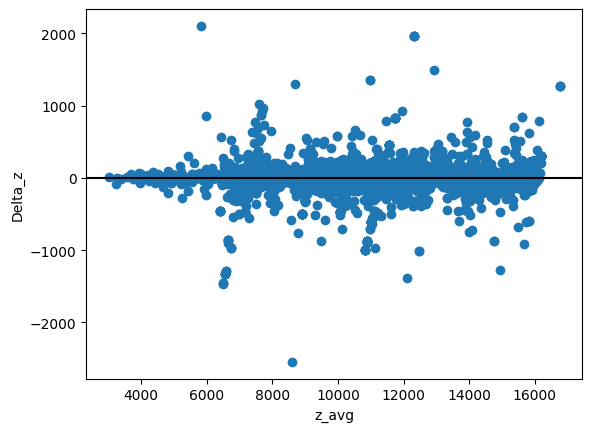

In [74]:
plt.scatter((df["zcmb_group"] + df["z_dist_est"]) * LIGHTSPEED / 2, (df["zcmb_group"] - df["z_dist_est"]) * LIGHTSPEED)
plt.axhline(y=0, c='k')
plt.ylabel("Delta_z")
plt.xlabel("z_avg")

In [83]:
np.absolute(df2["zcmb"] - df2["zcmb_group"]).sort_values() * LIGHTSPEED

2036        0.000000
4688        0.000000
1463        0.000000
751         0.000000
7867        0.000000
            ...     
33721    2475.386326
33950    2478.384250
33479    2686.440216
33321    2782.074010
33124    2849.827106
Length: 34059, dtype: float64